In [ ]:
"""
Notebook con analisis de presencia de caos otros indicadores para datos SARS-CoV-II en Chile.

- Dimension de Inmersion d (Flase Nearest Neihjbours Test. Kennel et al 1992)
- Tiempo de retardo (delay) tau
- Ventana de Theiler (ACF/ Time-Space Separation)
- Dimension de Correlacion (Grassberger and Procaccia Algorithm 1985b, Takens Estimator 1985)

"""

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from matplotlib import animation

sns.set()


from nolitsa import data, dimension, delay, noise, lyapunov
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.filters.hp_filter import hpfilter

from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency

# Santiago de Chile

In [98]:
data_casos_regiones = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto13\CasosNuevosCumulativo_T.csv', parse_dates=['Region'], index_col='Region')

SCL_cases = data_casos_regiones['Metropolitana']
CL_cases = data_casos_regiones['Total']

In [101]:
data_icovid = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto53\confirmados_regionales.csv', parse_dates=['fecha'], index_col='fecha')

data_icovid_SCL = data_icovid[data_icovid['Codigo region'] == 13]
data_icovid_SCL = data_icovid_SCL['confirmados.50']
SCL_cases_icovid = data_icovid_SCL

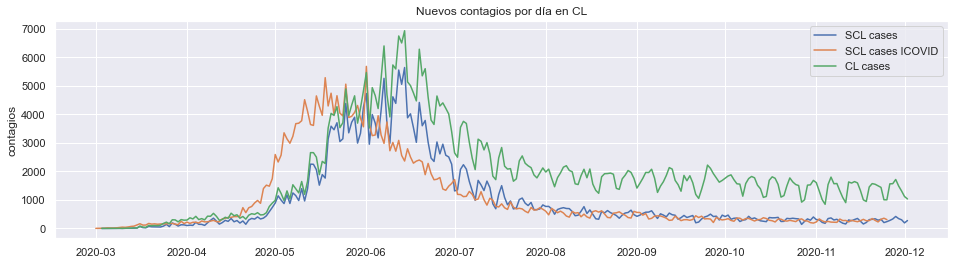

In [103]:
plt.figure(0, figsize=(16,4))
plt.plot(SCL_cases, label='SCL cases')
plt.plot(SCL_cases_icovid, label='SCL cases ICOVID')
plt.plot(CL_cases, label='CL cases')
plt.title('Nuevos contagios por día en CL')
plt.ylabel('contagios')
plt.legend()
plt.show()

In [69]:
data_muertes_chile_deis = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto37\Defunciones_deis_T.csv', skiprows=[1,2], parse_dates=['Serie'], index_col='Serie')

data_muertes_chile = data_muertes_chile_deis['confirmados.139']
CL_deaths = data_muertes_chile

In [94]:
data_muertes_SCL = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto50\DefuncionesDEIS_confirmadosPorComuna.csv', parse_dates=['Region'], index_col='Region')
ind = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto50\DefuncionesDEIS_confirmadosPorComuna_T.csv', parse_dates=['Region'], skiprows=[1,2,3,4],index_col='Region').index

data_muertes_SCL = data_muertes_SCL[data_muertes_SCL['Codigo region']==13].drop(columns=['Codigo region',	'Comuna',	'Codigo comuna',	'Poblacion']).sum()

SCL_deaths = data_muertes_SCL
SCL_deaths.index = ind


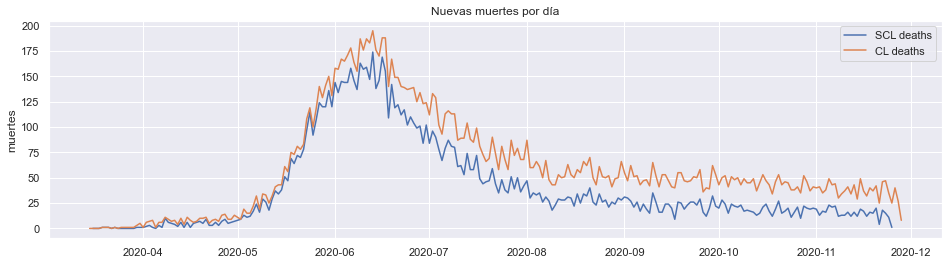

In [97]:
plt.figure(1, figsize=(16,4))
plt.clf()
plt.plot(SCL_deaths, label='SCL deaths')
plt.plot(CL_deaths, label='CL deaths')
plt.title('Nuevas muertes por día')
plt.ylabel('muertes')
plt.legend()
plt.show()

#### Primero pasamos los datos a csv para leerlos en R

In [106]:
SCL_cases = np.array(SCL_cases)
CL_cases = np.array(CL_cases)
SCL_cases_icovid = np.array(SCL_cases)

SCL_deaths  = np.array(SCL_deaths)
CL_deaths = np.array(CL_deaths)

In [107]:
SCL_cases = SCL_cases / np.max(SCL_cases)
SCL_cases_icovid = SCL_cases_icovid / np.max(SCL_cases_icovid)
CL_cases = CL_cases / np.max(CL_cases)

SCL_deaths  = SCL_deaths / np.max(SCL_deaths)
CL_deaths = CL_deaths / np.max(CL_deaths)

# np.savetxt('SCL_cases', SCL_cases, delimiter=',')
# np.savetxt('SCL_cases_icovid', SCL_cases_icovid, delimiter=',')
# np.savetxt('CL_cases', CL_cases, delimiter=',')

# np.savetxt('SCL_deaths', SCL_deaths, delimiter=',')
# np.savetxt('CL_deaths', CL_deaths, delimiter=',')